In [1]:
import os
os.chdir('../../..')

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from ai import cs

from databases.joint_sets import MuPoTSJoints
from util.misc import load

In [3]:
p = load('../models/21a1850a239642e4978f2cfa0756803f/test_results.pkl')

In [15]:
mask = p['pred'][:, 14, 0] != 0

In [16]:
gt = p['pose3d'][mask]
pred = p['pred'][mask]
vid_id = np.array([a for a, b in p['index']])[mask]

In [17]:
i = vid_id[0]

In [ ]:
mi = np.argmax(d)
mpred[mi, 14, ], mgt[mi, 14, ]

In [37]:
def get_rtp(nd):
    connected_joints = MuPoTSJoints().LIMBGRAPH
    cj = np.array(connected_joints)
    diff = nd[:, cj[:, 0], :] - nd[:, cj[:, 1], :]
    r, t, p = cs.cart2sp(diff[:, :, 0], diff[:, :, 1], diff[:, :, 2])
    return r, t, p

def get_lengths(nd):
    r, _, _ = get_rtp(nd)
    return r

In [39]:
for i in np.unique(vid_id):
    m = vid_id == i
    mgt = gt[m,]
    mpred = pred[m,]
    break
#     d = get_lengths(mgt) - get_lengths(mpred)
#     d = np.square(d)
#     d = np.sum(d, axis=1)
#     d = np.sqrt(d)
#     d = np.sort(d)
#     plt.plot(d)
#     plt.show()
#     print(np.sum(d < 1e-3))

In [41]:
r, t, p = get_rtp(mgt)
t

array([[ 5.01665437e-01,  2.41331971e-01, -1.76340429e-01, ...,
        -1.11475087e-01,  7.00766567e-04,  1.37184151e-01],
       [ 4.80297703e-01,  2.45725024e-01, -1.53672052e-01, ...,
        -1.35215306e-01,  6.59891843e-03,  1.10126358e-01],
       [ 4.68543359e-01,  2.49625953e-01, -1.42913414e-01, ...,
        -1.44209843e-01,  1.50962300e-02,  1.04067772e-01],
       ...,
       [ 5.40821146e-01,  1.68910523e-01,  6.06083637e-01, ...,
         7.66931960e-02,  3.93989778e-02, -4.63068312e-01],
       [ 2.08398646e-01,  6.11727405e-02,  6.80073799e-01, ...,
         3.55805449e-01,  2.09480907e-01, -4.65229221e-01],
       [ 2.56775511e-01,  1.51298472e-01,  7.35428181e-01, ...,
        -1.08448651e-01, -1.16885299e-01, -5.49359658e-01]])

In [42]:
r, t, p = get_rtp(mpred)
t

array([[ 0.36963023,  0.18009187, -0.11054684, ..., -0.36396083,
         0.03989919,  0.07446905],
       [ 0.41175714,  0.20984323, -0.09977688, ..., -0.33969839,
         0.03767403,  0.08898852],
       [ 0.40597349,  0.22278566, -0.12217341, ..., -0.37947607,
         0.05140455,  0.09206117],
       ...,
       [ 0.50219015,  0.18001096,  0.70866307, ...,  0.11889607,
         0.04860657, -0.59372342],
       [ 0.34399313,  0.08508389,  0.43766607, ...,  0.20756915,
         0.16605548, -0.31017405],
       [ 0.38860307,  0.15497497,  0.54506997, ..., -0.03690809,
         0.00532721, -0.35755168]])

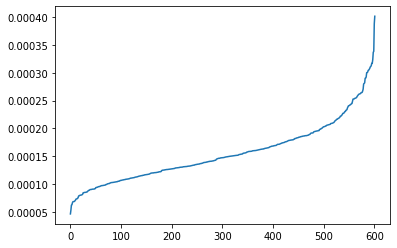

602


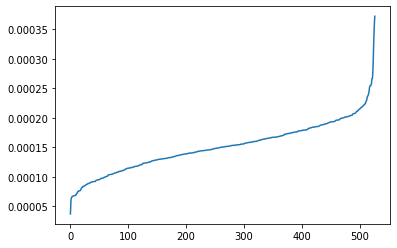

527


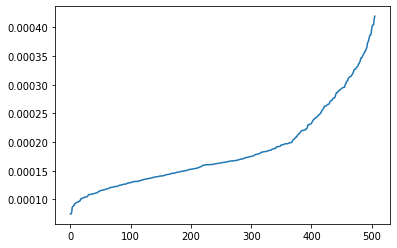

506


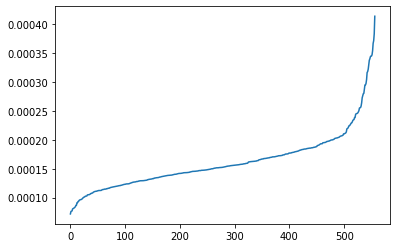

557


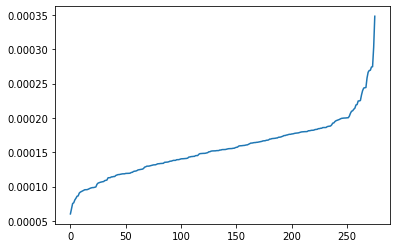

276


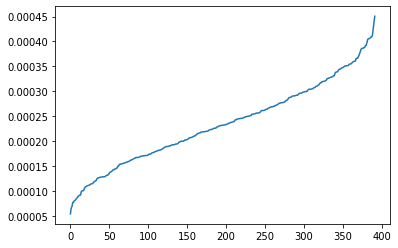

392


In [38]:
for i in np.unique(vid_id):
    m = vid_id == i
    mgt = gt[m,]
    mpred = pred[m,]
    d = get_lengths(mgt) - get_lengths(mpred)
    d = np.square(d)
    d = np.sum(d, axis=1)
    d = np.sqrt(d)
    d = np.sort(d)
    plt.plot(d)
    plt.show()
    print(np.sum(d < 1e-3))

In [33]:
np.mean(get_lengths(mgt) - get_lengths(mpred))

-5.725351906620843e-07

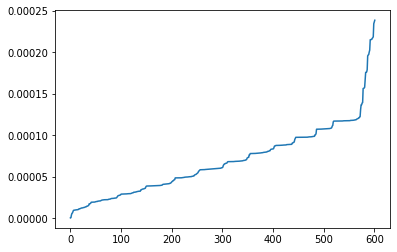

602


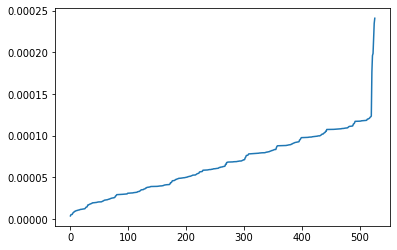

527


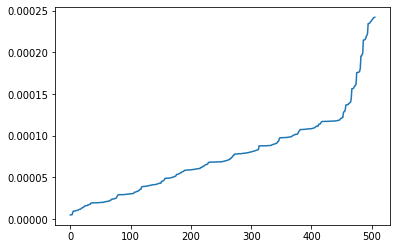

506


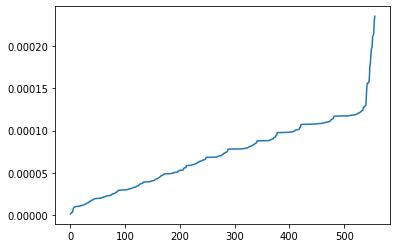

557


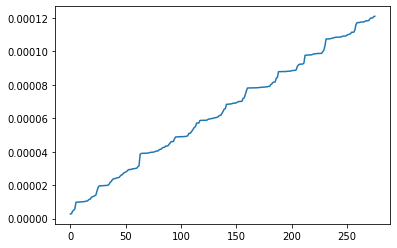

276


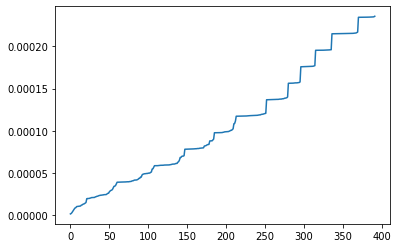

392


In [20]:
for i in np.unique(vid_id):
    m = vid_id == i
    mgt = gt[m,]
    mpred = pred[m,]
    d = mgt[:, 14, :] - mpred[:, 14, :]
    d = np.square(d)
    d = np.sum(d, axis=1)
    d = np.sqrt(d)
    d = np.sort(d)
    plt.plot(d)
    plt.show()
    print(np.sum(d < 1e-3))

In [ ]:
d = gt[:, 14, :] - pred[:, 14, :]

In [ ]:
plt.plot(np.sort(np.sum(d, axis=1)))

In [ ]:
correct_i = np.arange(len(d))[np.sum(d, axis=1) < 1e-6]

In [ ]:
len(correct_i)

In [ ]:
dist = correct_i[:-1] - correct_i[1:]

In [ ]:
unique, counts = np.unique(dist, return_counts=True)

In [ ]:
{u: c for u, c in zip(unique, counts)}

In [ ]:
[c for u, c in zip(*(np.unique([a for a, b in p['index']], return_counts=True)))]